In [1]:
from fastai.vision import *
from fastai.metrics import *
import shutil

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
path = Path('dog-breed')
path.ls()

[PosixPath('dog-breed/labels.csv.zip'),
 PosixPath('dog-breed/sample_submission.csv.zip'),
 PosixPath('dog-breed/valid'),
 PosixPath('dog-breed/test.zip'),
 PosixPath('dog-breed/train.zip'),
 PosixPath('dog-breed/test'),
 PosixPath('dog-breed/train'),
 PosixPath('dog-breed/models'),
 PosixPath('dog-breed/labels.csv')]

In [4]:
train = path/'train/'
test = path/'test/'
valid = path/'valid/'

In [5]:
df = pd.read_csv(path/'labels.csv')
df.head()


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [29]:
for f in df.breed.unique():
    os.mkdir(train/f)
    os.mkdir(valid/f)

In [37]:
for p in df.itertuples():
    file = f'dog-breed/train/{p.id}.jpg'
    trainpath = f'dog-breed/train/{p.breed}/{p.id}.jpg'
    os.rename(f'{file}', f'{trainpath}')

In [38]:
valid_split = 0.2

In [56]:
for f in os.listdir('dog-breed/train'):
    n = os.listdir(f'dog-breed/train/{f}')
    number = len(n)
    num_valid = round(valid_split*number)
    valid_img = random.sample(n, num_valid)    

    for img in valid_img:
        file = f'dog-breed/train/{f}/{img}'
        valid_path = f'dog-breed/valid/{f}/{img}'
        os.rename(f'{file}', f'{valid_path}')

In [6]:
data = ImageDataBunch.from_folder(path, ds_tfms = get_transforms(), bs=32, size=224)

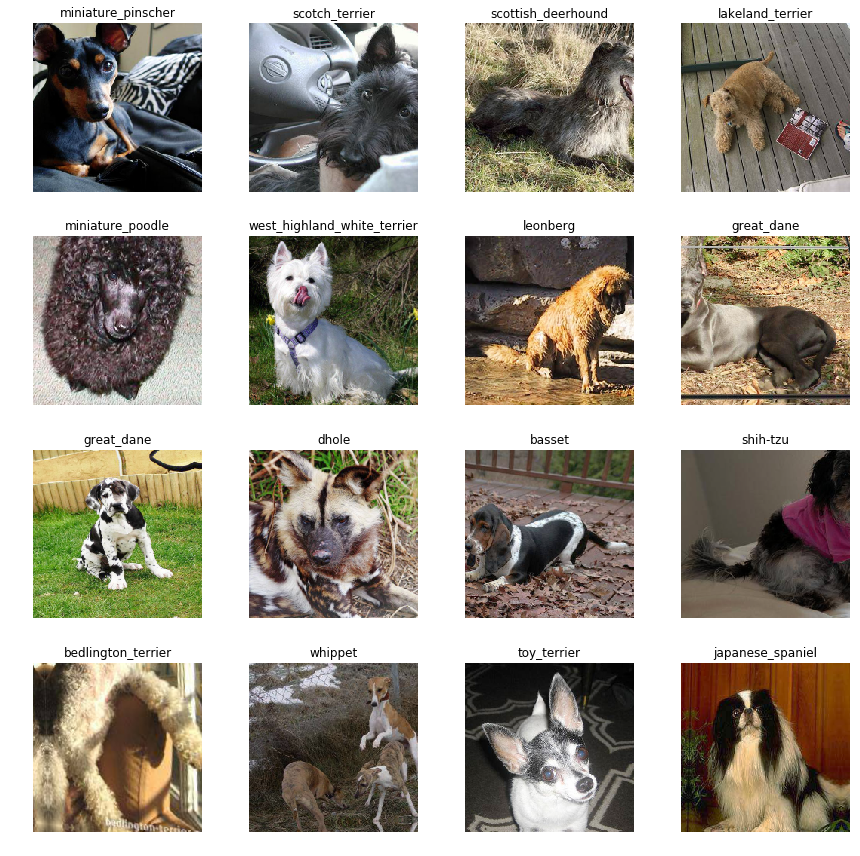

In [7]:
data.show_batch(rows=4, figsize=(12, 12))

In [8]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(2)

/opt/anaconda3/lib/python3.7/site-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.439508,0.734554,0.774669,00:43
1,0.858995,0.582670,0.828179,00:42


In [9]:
print(data.c, data.classes[10])

120 bedlington_terrier


In [10]:
learn.save('iter-1')

In [11]:
interpret = ClassificationInterpretation.from_learner(learn)

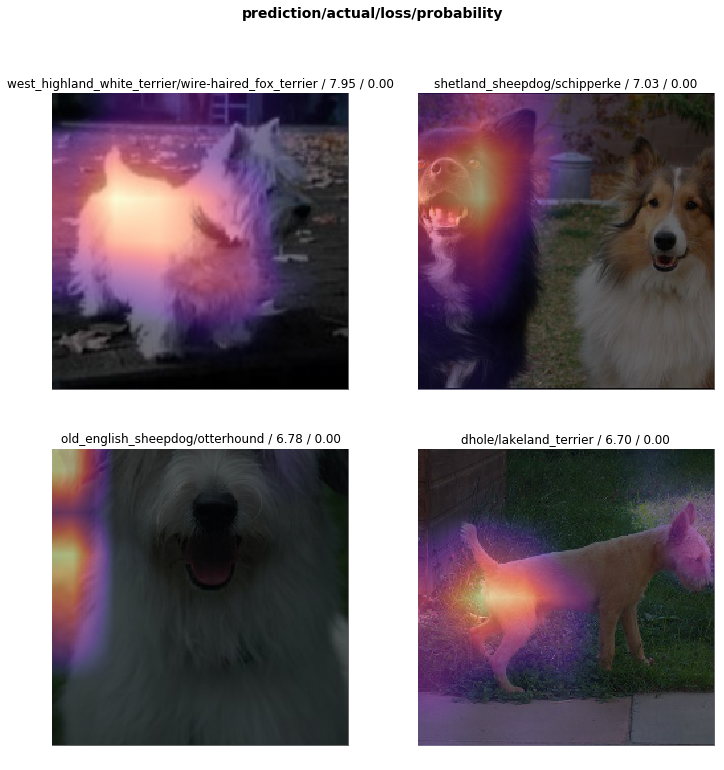

In [12]:
interpret.plot_top_losses(4, figsize=(12, 12))

In [75]:
interpret.most_confused(min_val = 2)

[('eskimo_dog', 'siberian_husky', 9),
 ('appenzeller', 'greater_swiss_mountain_dog', 5),
 ('miniature_poodle', 'toy_poodle', 5),
 ('shetland_sheepdog', 'collie', 5),
 ('walker_hound', 'english_foxhound', 5),
 ('appenzeller', 'entlebucher', 4),
 ('collie', 'border_collie', 4),
 ('french_bulldog', 'boston_bull', 4),
 ('lhasa', 'maltese_dog', 4),
 ('american_staffordshire_terrier', 'staffordshire_bullterrier', 3),
 ('australian_terrier', 'norfolk_terrier', 3),
 ('cocker_spaniel', 'english_springer', 3),
 ('english_foxhound', 'beagle', 3),
 ('greater_swiss_mountain_dog', 'entlebucher', 3),
 ('irish_wolfhound', 'scottish_deerhound', 3),
 ('lakeland_terrier', 'airedale', 3),
 ('lhasa', 'shih-tzu', 3),
 ('norwich_terrier', 'cairn', 3),
 ('staffordshire_bullterrier', 'american_staffordshire_terrier', 3),
 ('standard_poodle', 'miniature_poodle', 3),
 ('standard_schnauzer', 'miniature_schnauzer', 3),
 ('toy_poodle', 'miniature_poodle', 3),
 ('walker_hound', 'basset', 3),
 ('whippet', 'italian_gr

In [76]:
learn.load('iter-1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (8185 items)
[Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog]...
Path: dog-breed
x: ImageItemList (8185 items)
[Image (3, 500, 500), Image (3, 375, 500), Image (3, 375, 500), Image (3, 338, 500), Image (3, 375, 500)]...
Path: dog-breed;

Valid: LabelList
y: CategoryList (2037 items)
[Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog]...
Path: dog-breed
x: ImageItemList (2037 items)
[Image (3, 334, 500), Image (3, 375, 500), Image (3, 500, 333), Image (3, 333, 500), Image (3, 500, 375)]...
Path: dog-breed;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2

In [77]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


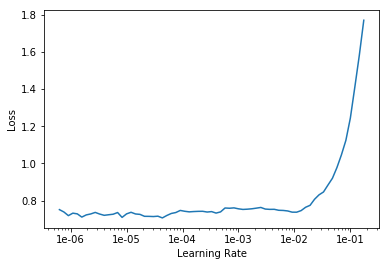

In [78]:
learn.recorder.plot()

In [79]:
learn.fit_one_cycle(4, max_lr = slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy
1,0.690615,0.587157,0.825233
2,0.725247,0.567825,0.827688
3,0.666817,0.563830,0.830142
4,0.711133,0.560274,0.831615


In [80]:
learn.save('iter-2')

In [ ]:
data = ImageDataBunch(path, bs = 64, size=299, ds_tfms = get_transform)

In [81]:
doc(get_transforms)

In [82]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,1.505096,0.940451,0.721159


In [83]:
learn.load('iter-2')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (8185 items)
[Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog]...
Path: dog-breed
x: ImageItemList (8185 items)
[Image (3, 500, 500), Image (3, 375, 500), Image (3, 375, 500), Image (3, 338, 500), Image (3, 375, 500)]...
Path: dog-breed;

Valid: LabelList
y: CategoryList (2037 items)
[Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog]...
Path: dog-breed
x: ImageItemList (2037 items)
[Image (3, 334, 500), Image (3, 375, 500), Image (3, 500, 333), Image (3, 333, 500), Image (3, 500, 375)]...
Path: dog-breed;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2

In [85]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


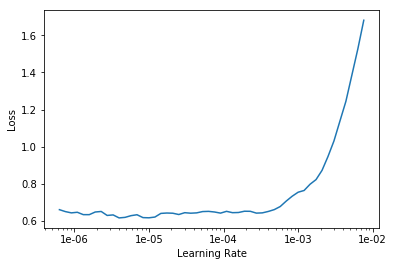

In [86]:
learn.recorder.plot()

In [87]:
learn.fit_one_cycle(4, max_lr = slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,accuracy
1,0.673291,0.553738,0.829161
2,0.663522,0.546930,0.837015
3,0.675433,0.545640,0.835542
4,0.627317,0.540305,0.837997


In [88]:
learn.save('iter-3')

In [90]:
learn = create_cnn(data, models.resnet50, metrics = accuracy )
learn.fit_one_cycle(2)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/jupyter/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 104320413.34it/s]


epoch,train_loss,valid_loss,accuracy
1,1.150209,0.636203,0.801669
2,0.655033,0.495074,0.843888


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


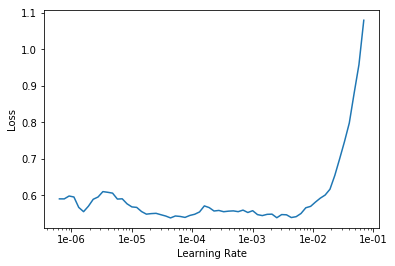

In [92]:
learn.lr_find()
learn.recorder.plot()

In [93]:
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy
1,0.567562,0.474842,0.848306
2,0.507223,0.463991,0.851743
3,0.484676,0.455923,0.853216
4,0.480604,0.458072,0.849779


In [94]:
learn.save('resnet-1')

In [95]:
learn.unfreeze()

In [96]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,1.478529,0.920496,0.728031


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


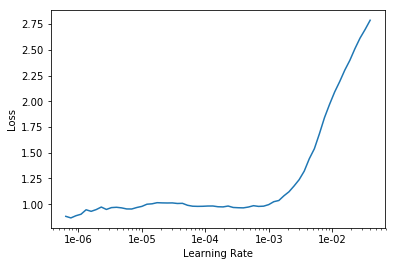

In [97]:
learn.lr_find()
learn.recorder.plot()

In [98]:
learn.load('resnet-1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (8185 items)
[Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog]...
Path: dog-breed
x: ImageItemList (8185 items)
[Image (3, 500, 500), Image (3, 375, 500), Image (3, 375, 500), Image (3, 338, 500), Image (3, 375, 500)]...
Path: dog-breed;

Valid: LabelList
y: CategoryList (2037 items)
[Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog, Category greater_swiss_mountain_dog]...
Path: dog-breed
x: ImageItemList (2037 items)
[Image (3, 334, 500), Image (3, 375, 500), Image (3, 500, 333), Image (3, 333, 500), Image (3, 500, 375)]...
Path: dog-breed;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2

In [99]:
learn.fit_one_cycle(8, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,accuracy
1,0.530551,0.453970,0.851252
2,0.489026,0.455373,0.849779
3,0.498621,0.447180,0.857634
4,0.449147,0.446332,0.854688
5,0.425723,0.442406,0.859597
6,0.433125,0.440495,0.855670
7,0.402532,0.444704,0.855670
8,0.384145,0.440343,0.860088


We can see that the model has overfitted. For now, it's not a bad thing. We can finetune this, re-learn after freezing, tune our hyper-params to get it to a better fit

I'll leave that as an exercise.